In [60]:
from features.feature_constructor import Feature
from features.violence_calls import ViolenceCalls
from features.population import Population
from detroit_geos import get_detroit_census_blocks

# Framework
`help(Feature)` gives a reasonable docstring, but may be easier to just look at the code, which contains descriptions of every method

We'll concentrate on using a child class - population

## Population example

In [61]:
# The Population class contains reference information for the data set
# Instantiating the object does not load the data by default
population = Population(year=2020, data_path = '.', population_data_path='population', verbose=True)

In [62]:
# loading the data is not a raw load, it contains transforms that we well always want, like column selection and renaming
population.load_data()
population.data.head()

Loaded 32022 rows


,block_id,population
0,261635001001000,14
1,261635001001001,100
2,261635001001002,82
3,261635001001003,50
4,261635001001004,66


In [63]:
# This decorated method standardizes block ids and does validation, in addition to any additional cleaning you may want to do
population.cleanse_data()

clean data has 32022 rows
cleansed data validator: block_id looks good


In [64]:
# this decorated method will automatically run the above steps and load data + set the index as necessary if it hasn't be done yet
# It defaults to full data load, so if the data set is large, you may want to load the data with custom arguments instead of doing 
# it automatically

# Outputs a series, which is the goal of this class
block_group_population = population.construct_feature(target_geo_grain='block group')

Generate index not run, or was run on the wrong grain. Creating index on block group grain
0 of 1507 block groups are unaccounted for


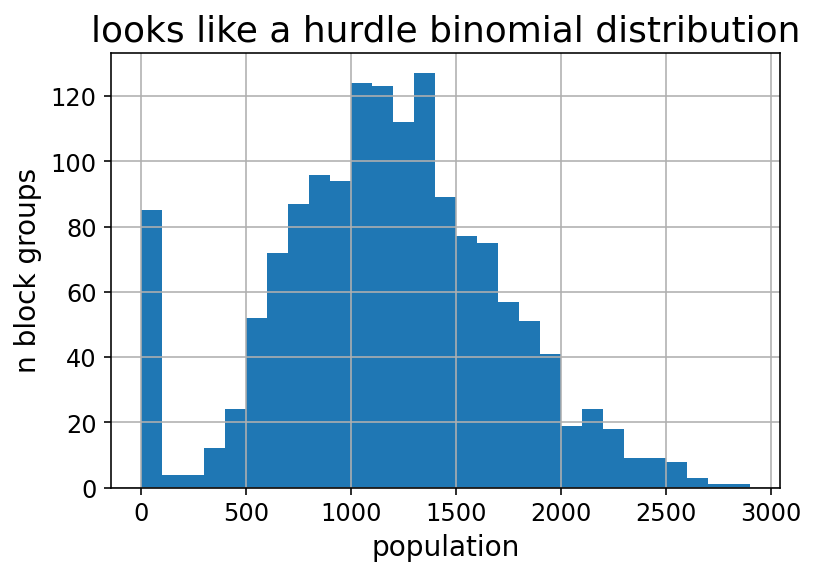

In [65]:
block_group_population.hist(bins=np.arange(0,3000,100))
_ = plt.gca().set(title='looks like a hurdle binomial distribution',xlabel='population',ylabel='n block groups')

## Violent calls example
spoiler: it works the same, but with some extra args

In [57]:
from features.feature_constructor import Feature
from features.violence_calls import ViolenceCalls
from features.population import Population
from detroit_geos import get_detroit_census_blocks

In [58]:
call_feat = ViolenceCalls(decennial_census_year=2010)
call_feat.load_data(use_lat_long=False,sample_rows=100)
# # call_feat.cleanse_data()
# call_feat.construct_feature(target_geo_grain='block')

Loaded 100 rows of data


In [59]:
# without reloading or recleaning the data, you can regenerate a new feature vector on a different grain
ftr = call_feat.construct_feature(target_geo_grain='tract')

ftr

Data not yet cleansed, cleaning
clean data has 3 rows
cleansed data validator: block_id looks good
Generate index not run, or was run on the wrong grain. Creating index on tract grain


,violence_calls
geo,
26163512400,1
26163536100,1
26163545700,1


In [56]:
s = pd.Series(np.random.rand((2)))
s.to_frame(

In [ ]:
call_feat.open_data_url('source')